As part of this project ,Our task is to build Network instrusion detection system to detect anomalies and attacks in the network

Let's first import libraries which will be needed for basic operations like reading,cleaning and visualization of various files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 200)

- There are 11 tables for different types of attacks with same column numbers

In [3]:
back = pd.read_csv("Data_of_Attack_Back.csv")
bufferoverflow = pd.read_csv("Data_of_Attack_Back_BufferOverflow.csv")
ftpwrite = pd.read_csv("Data_of_Attack_Back_FTPWrite.csv")
guesspassword = pd.read_csv("Data_of_Attack_Back_GuessPassword.csv")
neptune = pd.read_csv("Data_of_Attack_Back_Neptune.csv")
nmap = pd.read_csv("Data_of_Attack_Back_NMap.csv")
normal = pd.read_csv("Data_of_Attack_Back_Normal.csv")
portsweep = pd.read_csv("Data_of_Attack_Back_PortSweep.csv")
rootkit = pd.read_csv("Data_of_Attack_Back_RootKit.csv")
satan = pd.read_csv("Data_of_Attack_Back_Satan.csv")
smurf = pd.read_csv("Data_of_Attack_Back_Smurf.csv")

### Binomial Classification

- We have to create one more variable for tables in which this variable will have two values 'normal' in table normal and rest of the tables will have this variable as 'attack'.

In [4]:
# Let's creating a variable for all tables with column name Result

back['Result'] = 'attack'
bufferoverflow['Result'] = 'attack'
ftpwrite['Result'] = 'attack'
guesspassword['Result'] = 'attack'
neptune['Result'] = 'attack'
nmap['Result'] = 'attack'
portsweep['Result'] = 'attack'
rootkit['Result'] = 'attack'
satan['Result'] = 'attack'
smurf['Result'] = 'attack'

# And table normal will have this variable values 'normal'
normal['Result'] = 'normal'


In [5]:
# Appending all the tables into single dataframe

df = pd.concat([back,bufferoverflow,ftpwrite,guesspassword,neptune,nmap,portsweep,rootkit,satan,smurf,normal],axis=0,ignore_index=True,verify_integrity=True)
df = df[normal.columns]

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817543 entries, 0 to 817549
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817543 non-null  float64
 1    protocol_type                817543 non-null  float64
 2    service                      817543 non-null  float64
 3    flag                         817543 non-null  float64
 4    src_bytes                    817543 non-null  float64
 5    dst_bytes                    817543 non-null  float64
 6    land                         817543 non-null  float64
 7    wrong_fragment               817543 non-null  float64
 8    urgent                       817543 non-null  float64
 9    hot                          817543 non-null  float64
 10   num_failed_logins            817543 non-null  float64
 11   logged_in                    817543 non-null  float64
 12   num_compromised              817543 non-nul

In [8]:
# Checking for duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

Removing spaces from the columns name of dataframe

In [10]:
# resetting the index of dataframe
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [11]:
df.columns = df.columns.str.replace(" ","")

Text(0.5, 1.0, 'Counts of target variable values')

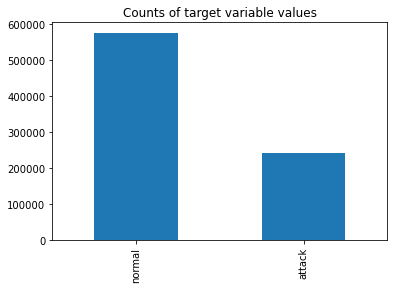

In [12]:
df['Result'].value_counts().plot(kind='bar')
plt.title("Counts of target variable values")

In [13]:
# Checking number of different value in result column
df['Result'].value_counts(normalize=True)

normal    0.705419
attack    0.294581
Name: Result, dtype: float64

- Our Dataset is imbalanced class dataset
- As value of 'normal' in target variable is around 70 percent and that of 'attack' is 30 percent

Assigning target variable values into numeric form 'attack' as 1 and 'normal' as 0

In [14]:
df['Result'] = df['Result'].apply(lambda x: 0 if x=='normal' else 1)

In [15]:
df_copy = df.copy()

In [16]:
X = df_copy.drop('Result',axis=1)
y = df_copy['Result']

In [17]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.0,0.2,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.002,0.0,0.0,0.0,0.050,0.1,0.0,0.100,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.0,0.2,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.003,0.0,0.0,0.0,0.033,0.1,0.0,0.067,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.0,0.2,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.004,0.0,0.0,0.0,0.025,0.1,0.0,0.050,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.0,0.2,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.004,0.0,0.0,0.0,0.000,0.1,0.0,0.000,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.0,0.2,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.004,0.0,0.0,0.0,0.000,0.1,0.0,0.000,0.005,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0


Inside dataset,following is representation of datatypes of diiferent features:
- Nominal data = Protocol_type,Service,Flag
- Binary data = land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
- Numeric = Rest of the features are numeric

In [18]:
nominal_var = ['protocol_type','service','flag','land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']

In [19]:
numeric_var = []
for i in X.columns:
    if i not in nominal_var:
        numeric_var.append(i)

 let study outliers for numeric data

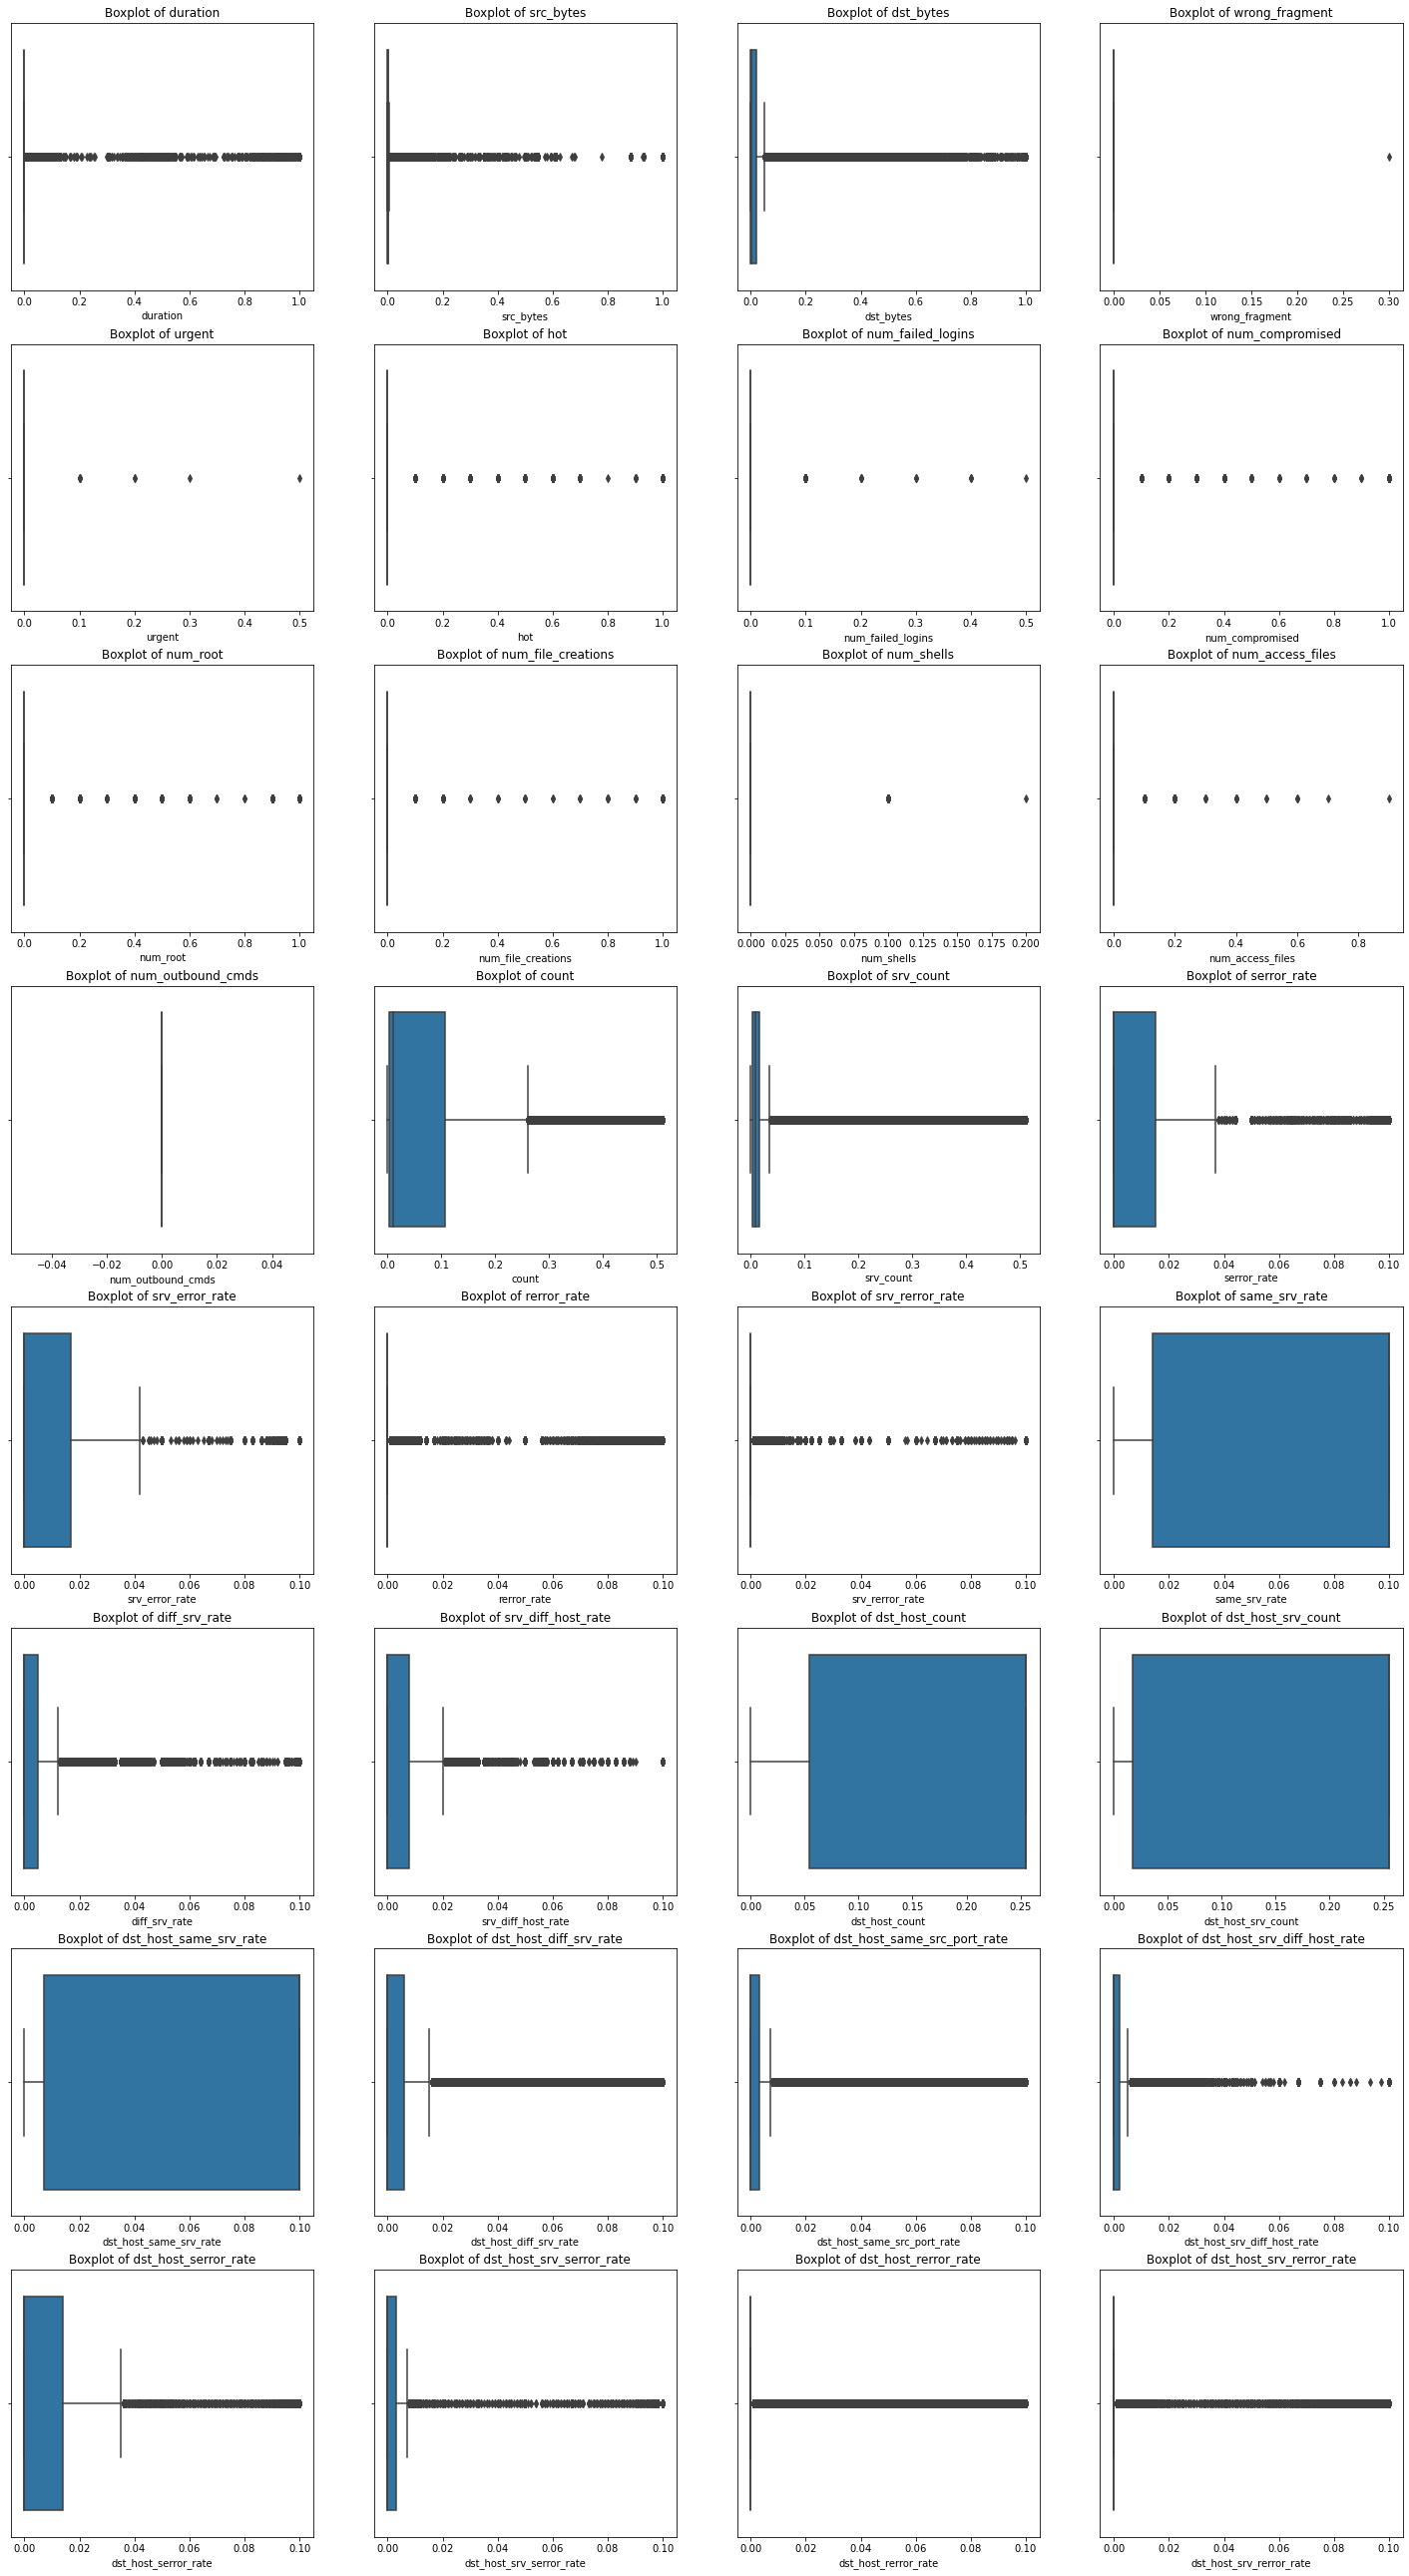

In [20]:
plt.figure(figsize=(25,70))
n=1
for col in X[numeric_var]:
    plt.subplot(12,4,n)
    sns.boxplot(data=X,x=col)
    plt.title('Boxplot of '+ col )
    n+=1
plt.show()

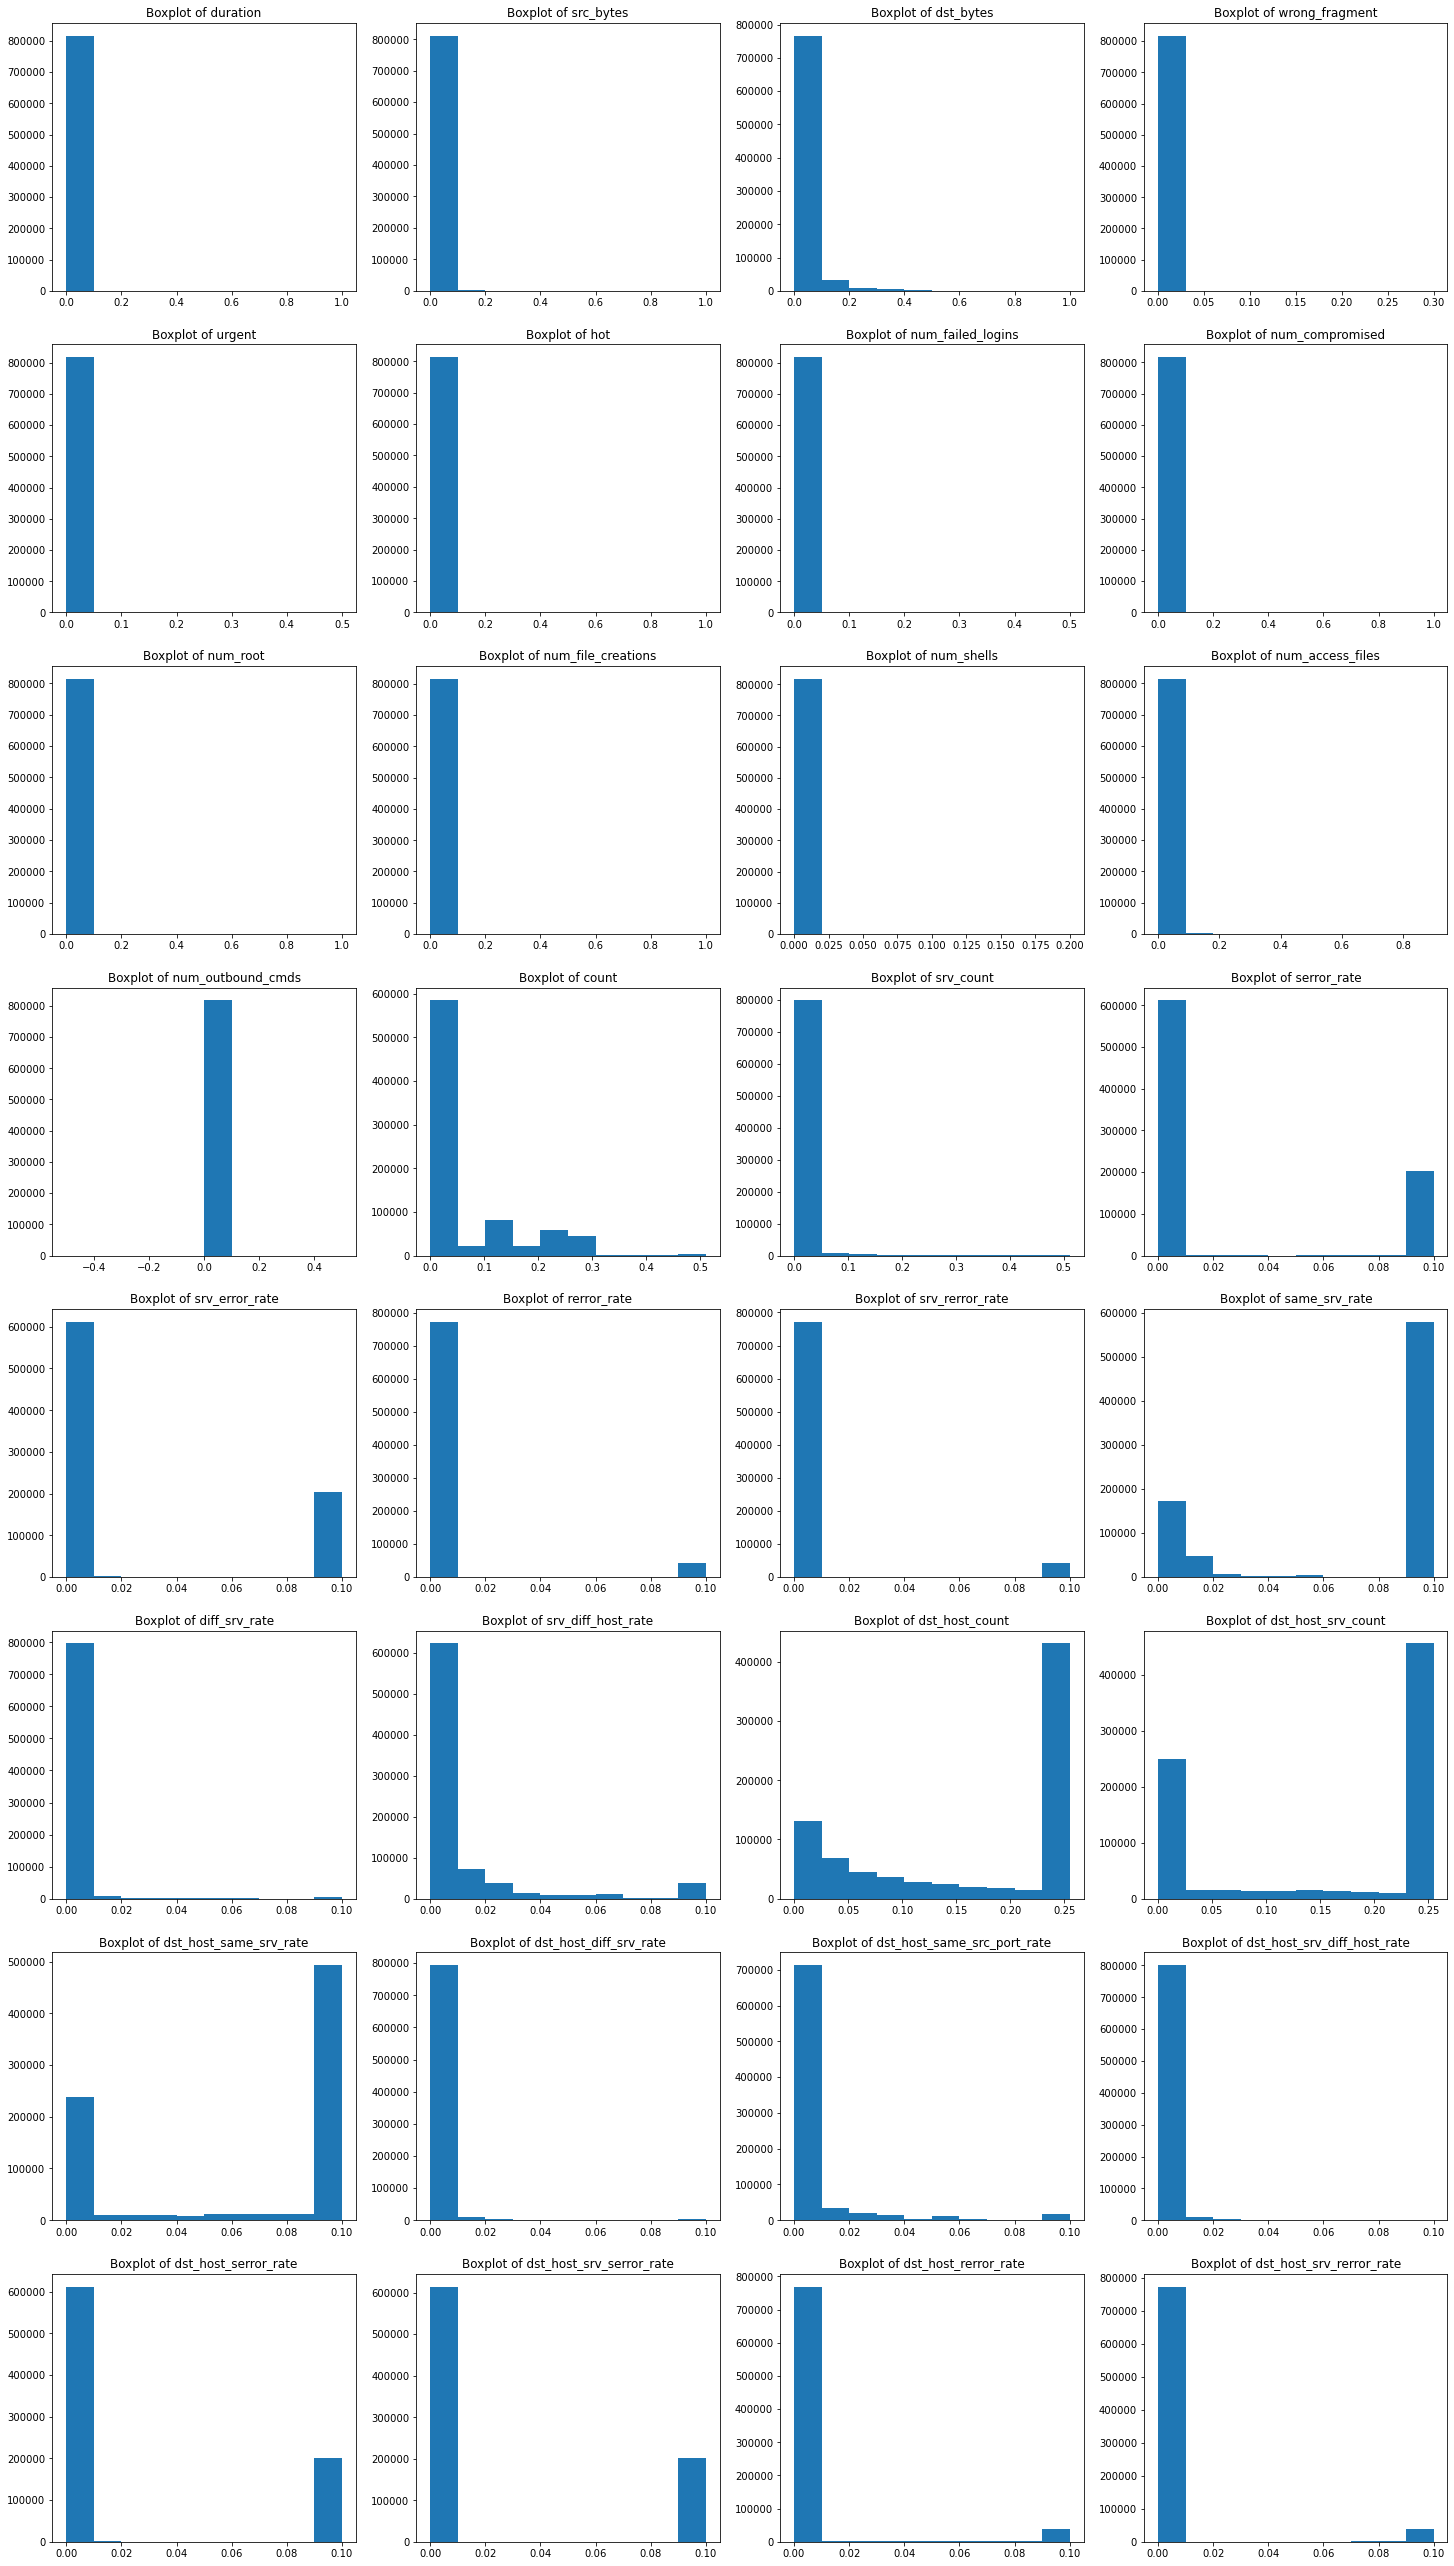

In [21]:
plt.figure(figsize=(25,70))
n=1
for col in X[numeric_var]:
    plt.subplot(12,4,n)
    plt.hist(X[col])
    plt.title('Boxplot of '+ col )
    n+=1
plt.show()

Outliers handling for numeric variables using clip

In [22]:
# defining a function to cap values under 98th percentile in numeric variables
def outliers_capping(x):
    x = x.clip(lower = x.quantile(0.0),upper = x.quantile(0.98))
    return x

In [23]:
X[numeric_var] = X[numeric_var].apply(lambda x:outliers_capping(x))

Scaling the dataset

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
cols = X.columns

In [26]:
scaler = StandardScaler()
scaler.fit_transform(X)
X = pd.DataFrame(X,columns=cols)

Spliting the dataset into train and test set

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

As we know that our datset is imbalanced so let's try resampling technique on training dataset for better results and our classifiers give equal importance to different classes of target variable. We will use undersampling as we have aroung 800k observations so we can sacrifice some of our training data

Undersampling

In [29]:
y_train.value_counts()

0    386281
1    161472
Name: Result, dtype: int64

In undersampling we will reduce number of class 0 observations numbers to equal number of class 1 observations,i.e 161472

In [30]:
df_to_resample = pd.concat([X_train,y_train],axis=1)

In [31]:
from sklearn.utils import resample

In [32]:
df_maj =df_to_resample[(df_to_resample['Result']==0)]
df_min =df_to_resample[(df_to_resample['Result'])==1]

In [33]:
# undersampling majority class
df_under = resample(df_maj,
                   replace=True,
                   n_samples=161472,
                   random_state=42)

df_new = pd.concat([df_under,df_min])

In [34]:
df_new['Result'].value_counts()

0    161472
1    161472
Name: Result, dtype: int64

After undersampling now we have observations in training dataset which have equal number of classes

In [35]:
X_train_new = df_new.drop('Result',axis=1)
y_train_new = df_new['Result']

Modeling

Now trying different classifiers and comparing their accuracies and f1score on training and testing data

In [36]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
from xgboost import XGBClassifier

In [39]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
xbc = XGBClassifier()

In [40]:
from sklearn.metrics import accuracy_score,f1_score

In [41]:
# defining a function which will give table of accuracies foer all the model
def classifier(X_tr,X_te,y_tr,y_te):
    model_list = [dt,rf,nb,xbc]
    model_name = []
    acc_tr,acc_te = [],[]
    f1_tr,f1_te = [],[]
    time_taken = []
    
    for model in model_list:
        start_time = time.time()
        
        model.fit(X_tr,y_tr)
        
        y_tr_pred = model.predict(X_tr)
        y_te_pred = model.predict(X_te)
        
        y_tr_acc = accuracy_score(y_tr,y_tr_pred)
        y_te_acc = accuracy_score(y_te,y_te_pred)
        
        y_tr_f1 = f1_score(y_tr,y_tr_pred,average='micro')
        y_te_f1 = f1_score(y_te,y_te_pred,average='micro')
        
        time1 = time.time()-start_time
        
        model_name.append(model.__class__.__name__)
        acc_tr.append(y_tr_acc)
        acc_te.append(y_te_acc)
        f1_tr.append(y_tr_f1)
        f1_te.append(y_te_f1)
        time_taken.append(time1)
        
    model_df = pd.DataFrame({'model_name':model_name,
                           'accuracy_train':acc_tr,
                           'accuracy_test':acc_te,
                           'f1score_train':f1_tr,
                           'f1score_test':f1_te,
                           'time_taken':time_taken})
    return model_df

In [42]:
%%time
classifier(X_train_new,X_test,y_train_new,y_test)

CPU times: total: 3min 12s
Wall time: 1min 38s


,model_name,accuracy_train,accuracy_test,f1score_train,f1score_test,time_taken
0,DecisionTreeClassifier,1.000000,0.999678,1.000000,0.999678,3.415336
1,RandomForestClassifier,1.000000,0.999911,1.000000,0.999911,45.916969
2,GaussianNB,0.988617,0.991293,0.988617,0.991293,1.618444
3,XGBClassifier,1.000000,0.999904,1.000000,0.999904,47.117208


Every choosen model is giving good results

let choose Decision tree regressor to visualize the confusion matrix and important features

In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_train_new,y_train_new)

DecisionTreeClassifier()

In [44]:
y_tr_dt = dt.predict(X_train_new)
y_te_dt = dt.predict(X_test)

In [45]:
pd.Series(dt.feature_importances_,index=X_train_new.columns).sort_values(ascending=False).iloc[:3]

same_srv_rate    0.918156
protocol_type    0.031648
src_bytes        0.019891
dtype: float64

The most important feature is same_srv_rate

In [46]:
from sklearn.metrics import confusion_matrix as cm

In [47]:
cf_matrix_tr = cm(y_train_new,y_tr_dt)
cf_matrix_te = cm(y_test,y_te_dt)

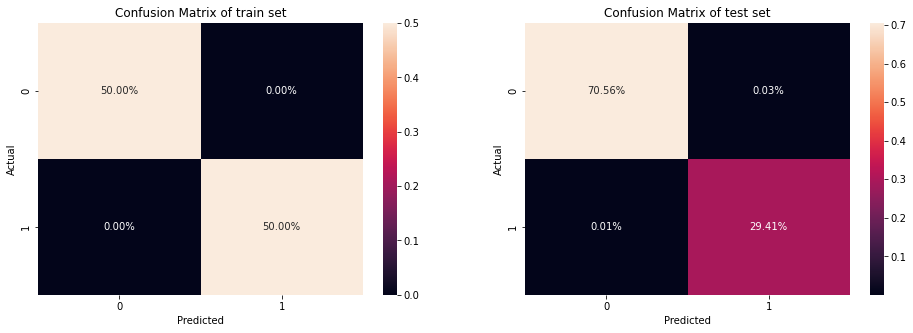

In [48]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.heatmap(cf_matrix_tr/np.sum(cf_matrix_tr),annot=True,fmt='.2%').set(title="Confusion Matrix of train set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(cf_matrix_te/np.sum(cf_matrix_te),annot=True,fmt='.2%').set(title = 'Confusion Matrix of test set')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

while visualizing confusion matrix after using Decision tree as classifiers we may draw some conclusion
- 1(positive) representing 'attack' and 0(negative) representing 'normal' classes
- In our training dataset there is zero percentage of False positive and false negative
- In our testing dataset model is only predicting 0.02 percent of false positive and 0.01 percent of false negative

### Multinominal Classification

For Multinominal classification problem  our dependent variable will have following classes
- 0 Normal
- 1 Back
- 2 Buffer Over Flow
- 3 FTP Write
- 4 Guess Password
- 5 Neptune
- 6 N-Map
- 7 Port Sweep
- 8 Root Kit
- 9 Satan
- 10 Smurf

In [49]:
# Let's creating a variable for all tables with column name Result and assigning classes to them

back['Result'] = 'Back'
bufferoverflow['Result'] = 'Buffer Over Flow'
ftpwrite['Result'] = 'FTP Write'
guesspassword['Result'] = 'Guess Password'
neptune['Result'] = 'Neptune'
nmap['Result'] = 'N-Map'
portsweep['Result'] = 'Port Sweep'
rootkit['Result'] = 'Root Kit'
satan['Result'] = 'Satan'
smurf['Result'] = 'Smurf'

# And table normal will have this variable values 'normal'
normal['Result'] = 'Normal'

In [50]:
df_multi =pd.concat([back,bufferoverflow,ftpwrite,guesspassword,neptune,nmap,portsweep,rootkit,satan,smurf,normal],axis=0,ignore_index=True,verify_integrity=True)
df_multi = df_multi[normal.columns]

In [51]:
df_multi.dropna(inplace=True)
df_multi.drop_duplicates(inplace=True)

In [52]:
df_multi.shape

(817543, 42)

In [53]:
df_multi.columns = df_multi.columns.str.replace(" ","")

Let's see number of classes in our dependent variable

<AxesSubplot:>

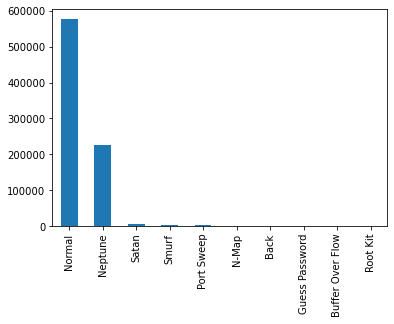

In [54]:
df_multi['Result'].value_counts().plot(kind='bar')

In [55]:
df_multi['Result'].value_counts(normalize=True)

Normal              0.705419
Neptune             0.277940
Satan               0.006139
Smurf               0.003678
Port Sweep          0.003625
N-Map               0.001901
Back                0.001184
Guess Password      0.000065
Buffer Over Flow    0.000037
Root Kit            0.000012
Name: Result, dtype: float64

Among all the attacks only Neptune attack have approx 28 percent of share in dataset else all the attacks are less than 1 percent

Our dataset is highly imbalanced

Our model will require good resampling technique but before that we have to follow all preprocessing steps that we did in binominal classification problem

In [56]:
# creating a dictionary to map categorical independent variable to numeric
title_map = {'Normal':0,
            'Back':1,
            'Buffer Over Flow':2,
            'Guess Password':3,
            'Neptune':4,
            'N-Map':5,
            'Port Sweep':6,
            'Root Kit':7,
            'Satan':8,
            'Smurf':9}

In [57]:
df_multi['Result'] = df_multi['Result'].map(title_map)

In [58]:
X_multi = df_multi.drop("Result",axis=1)
y_multi = df_multi['Result']

Outliers Handling

In [59]:
X_multi[numeric_var] = X_multi[numeric_var].apply(lambda x :outliers_capping(x))

Scaling

In [60]:
cols = X_multi.columns

In [61]:
X_multi = scaler.fit_transform(X_multi)
X_multi = pd.DataFrame(X_multi,columns=cols)

Spliting Dataset into train and test set

In [62]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_multi,y_multi,test_size=0.33,random_state=42)

Now Let's see number of different classes in train dataset

In [63]:
y_train1.value_counts()

0    386280
4    152310
8      3335
9      2055
6      1995
5      1055
1       660
3        40
2        17
7         6
Name: Result, dtype: int64

In [64]:
y_test1.value_counts()

0    190430
4     74918
8      1684
6       969
9       952
5       499
1       308
2        13
3        13
7         4
Name: Result, dtype: int64

Data need to be resampled but let's first check accuracy score without resampling

In [65]:
classifier(X_train1,X_test1,y_train1,y_test1)

,model_name,accuracy_train,accuracy_test,f1score_train,f1score_test,time_taken
0,DecisionTreeClassifier,0.999998,0.999778,0.999998,0.999778,9.780079
1,RandomForestClassifier,0.999998,0.999863,0.999998,0.999863,115.549563
2,GaussianNB,0.914903,0.915201,0.914903,0.915201,5.534724
3,XGBClassifier,0.999998,0.999896,0.999998,0.999896,432.758986


Resampling

Now we can check accuracies after resampling of Dataset
- we will make numbers of observations of all classes equal to 20000 either by oversamping and undersampling
- class 0 and class 4 have observations above 20000 so for these classes we will do undersampling
- And for remaining classes we will do oversampling

Defining a function for resampling

In [66]:
df_0 = df_multi[(df_multi['Result']==0)]
df_1= df_multi[(df_multi['Result']==1)]
df_2 = df_multi[(df_multi['Result']==2)]
df_3 = df_multi[(df_multi['Result']==3)]
df_4 = df_multi[(df_multi['Result']==4)]
df_5 = df_multi[(df_multi['Result']==5)]
df_6 = df_multi[(df_multi['Result']==6)]
df_7 = df_multi[(df_multi['Result']==7)]
df_8 = df_multi[(df_multi['Result']==8)]
df_9 = df_multi[(df_multi['Result']==9)]

In [67]:
list_df = [df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9]
list_df_new = []
for df1 in list_df:
    df1 = resample(df1,
                  replace=True,
                  n_samples=20000,
                  random_state=42)
    list_df_new.append(df1)
    

In [68]:
df_resampled = pd.concat(list_df_new,axis=0,ignore_index=True)

In [69]:
df_resampled['Result'].value_counts()

0    20000
1    20000
2    20000
3    20000
4    20000
5    20000
6    20000
7    20000
8    20000
9    20000
Name: Result, dtype: int64

Now, we have resampled our training dataset and now all the classes have same number of observations that is equal to 20000

In [70]:
X_resampled = df_resampled.drop('Result',axis=1)
y_resampled = df_resampled['Result']

In [71]:
classifier(X_resampled,X_test1,y_resampled,y_test1)

,model_name,accuracy_train,accuracy_test,f1score_train,f1score_test,time_taken
0,DecisionTreeClassifier,0.999965,0.576589,0.999965,0.576589,2.061978
1,RandomForestClassifier,0.999965,0.942615,0.999965,0.942615,33.061868
2,GaussianNB,0.876940,0.705845,0.876940,0.705845,3.269860
3,XGBClassifier,0.999965,0.790137,0.999965,0.790137,171.031252


Conclusions after resampling of training data
- Accuracies and f1scores of all the model have decrease for testing data
- GaussianNB and XGBClassifier both models are not performing that well that they were, before resampling
- But After Resampling Random Forest Classifier is still performing well on training and testing data

Let's try hyperparameter tuning and cross validation on RandomForestClassifier and see if testing accuracies improve or not

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
rf = RandomForestClassifier(random_state=42)
params = {'n_estimators':[100,150,200],
         'max_depth':[8,10],
         }
rf_grid = GridSearchCV(estimator=rf,
                      param_grid=params,
                      cv=3)
rf_grid.fit(X_resampled,y_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [8, 10], 'n_estimators': [100, 150, 200]})

In [74]:
y_rf_tr = rf_grid.predict(X_resampled)
y_rf_te = rf_grid.predict(X_test1)

In [75]:
print('Accuracy train :',accuracy_score(y_resampled,y_rf_tr))
print('Accuracy test :',accuracy_score(y_test1,y_rf_te))

Accuracy train : 0.999695
Accuracy test : 0.9396604766670373


In [76]:
print('f1 score train :',f1_score(y_resampled,y_rf_tr,average='weighted'))
print('f1 score test :',f1_score(y_test1,y_rf_te,average='weighted'))

f1 score train : 0.9996950177030122
f1 score test : 0.9608335495032072


- After huperparameter tuning the f1 score of test dataset is improved from 0.9363 to 0.96083

Confustion Matrix for training dataset




<AxesSubplot:>

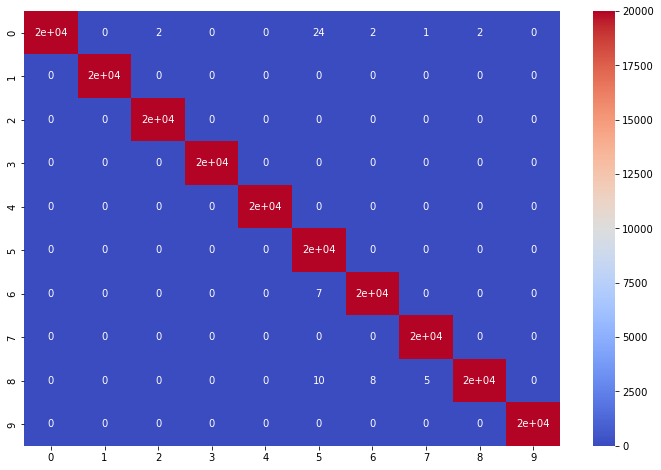

In [77]:
print('Confustion Matrix for training dataset')
print('\n')
plt.figure(figsize=(12,8))
sns.heatmap(cm(y_resampled,y_rf_tr),annot=True,cmap='coolwarm')

Confustion Matrix for testing dataset




<AxesSubplot:>

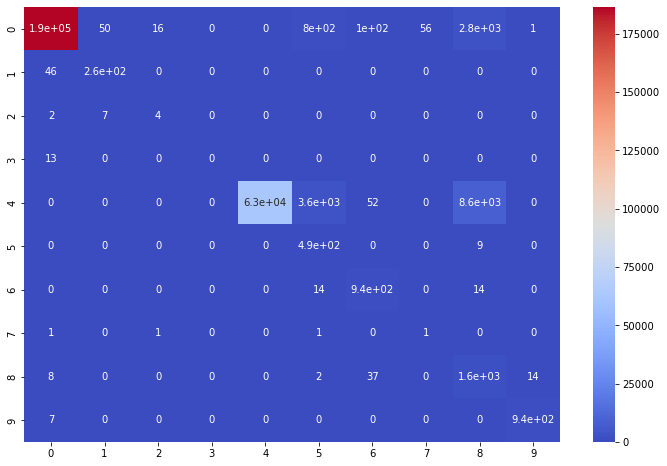

In [78]:
print('Confustion Matrix for testing dataset')
print('\n')
plt.figure(figsize=(12,8))
sns.heatmap(cm(y_test1,y_rf_te),annot=True,cmap='coolwarm')